In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
url = '../Data/temperature_series_2024.csv'

In [5]:
temperatures = pd.read_csv(url, parse_dates=['Date'], index_col='Date')

temperatures.head(10)

,Temperature
Date,
2024-01-01,5.993428
2024-01-02,4.723471
2024-01-03,6.295377
2024-01-04,8.046060
2024-01-05,4.531693
2024-01-06,4.531726
2024-01-07,8.158426
2024-01-08,6.534869
2024-01-09,4.061051


In [6]:
temperatures.index.dtype

dtype('<M8[ns]')

In [7]:
temperatures['7-days'] = temperatures['Temperature'].rolling(window=7).mean()

In [8]:
temperatures.head(100)

,Temperature,7-days
Date,,
2024-01-01,5.993428,NaN
2024-01-02,4.723471,NaN
2024-01-03,6.295377,NaN
2024-01-04,8.046060,NaN
2024-01-05,4.531693,NaN
...,...,...
2024-04-05,10.072970,11.769615
2024-04-06,13.592241,12.136144
2024-04-07,13.522111,12.611566


In [9]:
temperatures['7-days'] = temperatures['7-days'].fillna( temperatures['Temperature'].expanding().mean() ) 

In [10]:
temperatures.head()

,Temperature,7-days
Date,,
2024-01-01,5.993428,5.993428
2024-01-02,4.723471,5.358450
2024-01-03,6.295377,5.670759
2024-01-04,8.046060,6.264584
2024-01-05,4.531693,5.918006


In [11]:
plt.figure( figsize = (20, 10 ) )

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

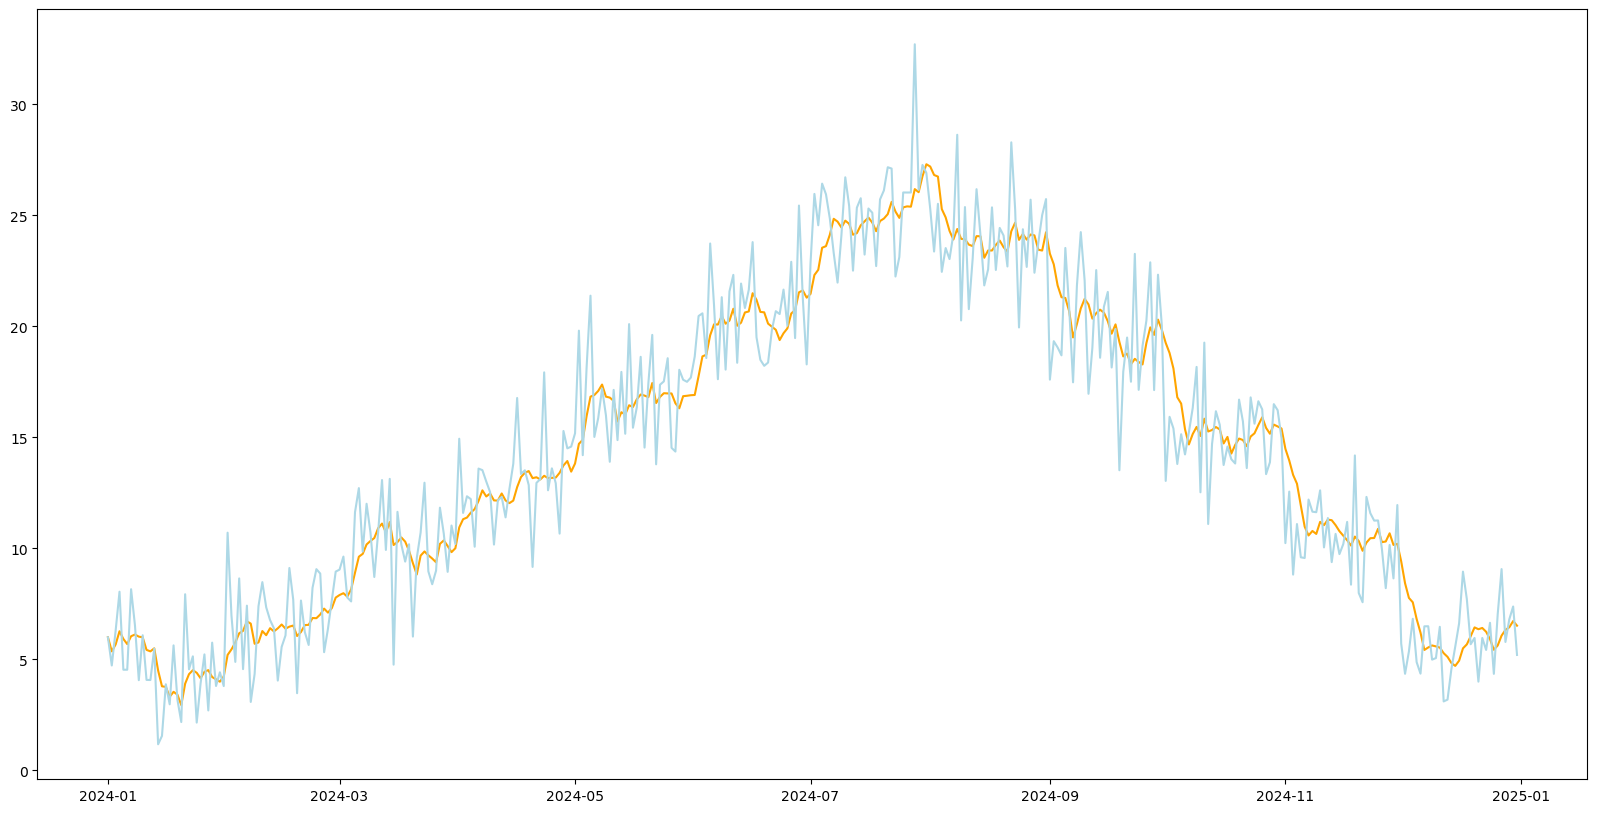

In [12]:
plt.figure( figsize = (20, 10 ) )
plt.plot( temperatures.index, temperatures['7-days'], label= 'Température', color='orange') 
plt.plot(  temperatures.index, temperatures['Temperature'], color='lightblue' ) 

Moyenne : 2.99827868852459
Médiane : 2.9
Ecart type : 1.3836381890011826


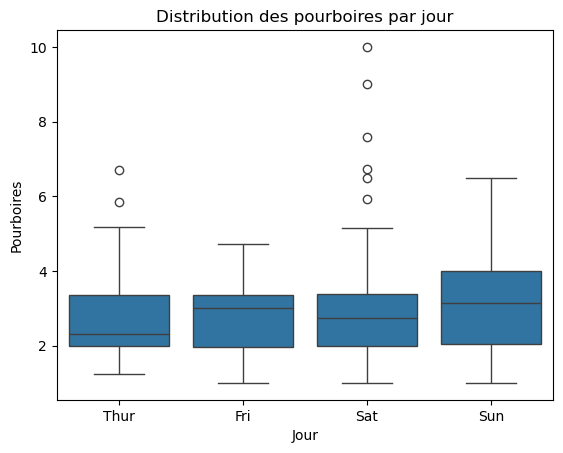

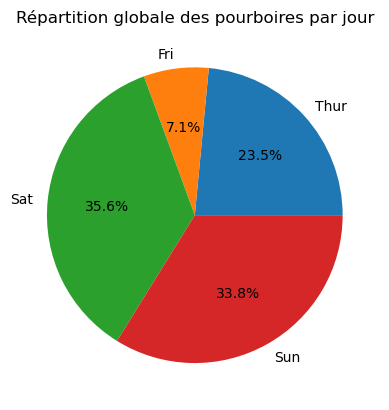

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Charger les données "tips"
data = sns.load_dataset("tips")

# Calculer la moyenne, la médiane et l'écart type des pourboires
mean_tips = data["tip"].mean()
median_tips = data["tip"].median()
std_tips = data["tip"].std()

print("Moyenne :", mean_tips)
print("Médiane :", median_tips)
print("Ecart type :", std_tips)

# Créer un diagramme en boîtes pour afficher la distribution des pourboires par jour
sns.boxplot(x=data["day"], y=data["tip"] )
plt.title("Distribution des pourboires par jour")
plt.xlabel("Jour")
plt.ylabel("Pourboires")
plt.show()

# Calculer le total des pourboires par jour
total_tips_per_day = data.groupby("day", observed=False)["tip"].sum()

# Créer un diagramme en secteurs pour afficher la répartition globale des pourboires par jour
plt.pie(total_tips_per_day, labels=total_tips_per_day.index, autopct='%1.1f%%')
plt.title("Répartition globale des pourboires par jour")
plt.show()

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Tue, 09 Jul 2024   Prob (F-statistic):           6.69e-34
Time:                        16:31:37   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.0

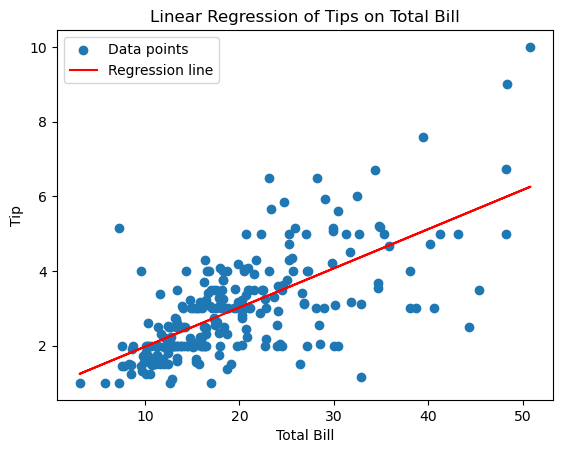

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Charger les données "tips"
data = sns.load_dataset("tips")

# Régression linéaire simple
X = data["total_bill"]
y = data["tip"]
X = sm.add_constant(X)  # Ajout d'une constante pour l'ordonnée à l'origine

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Résultats de la régression
print(model.summary())

# Diagramme en nuage de points avec droite de régression
plt.scatter(data["total_bill"], data["tip"], label="Data points")
plt.plot(data["total_bill"], predictions, color='red', label="Regression line")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Linear Regression of Tips on Total Bill")
plt.legend()
plt.show()

   Home   price  sqft_living  Bedrooms  Bathrooms  Offers Brick Neighborhood
0     1  114300         1790         2          2       2    No         East
1     2  114200         2030         4          2       3    No         East
2     3  114800         1740         3          2       1    No         East
3     4   94700         1980         3          2       3    No         East
4     5  119800         2130         3          3       3    No         East
               price  sqft_living
count     128.000000   128.000000
mean   130427.343750  2000.937500
std     26868.770371   211.572431
min     69100.000000  1450.000000
25%    111325.000000  1880.000000
50%    125950.000000  2000.000000
75%    148250.000000  2140.000000
max    211200.000000  2590.000000
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0

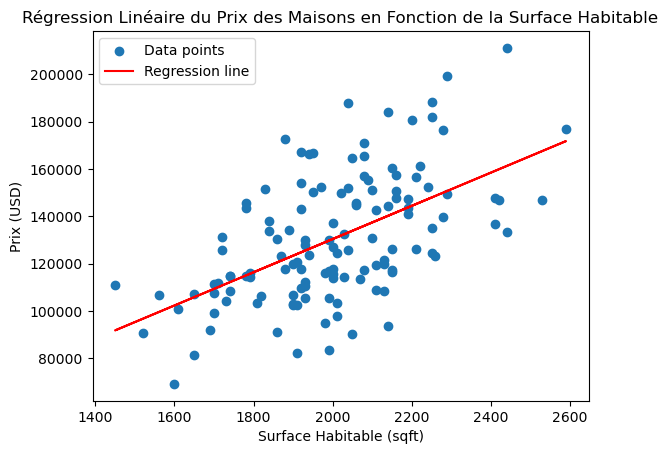

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Charger les données "house_prices"


url = '../Data/house_prices.csv'

data = pd.read_csv(url)

# Exploration des données
print(data.head())
print(data[["price", "sqft_living"]].describe())

# Préparation des données pour la régression
X = data["sqft_living"]
y = data["price"]
X = sm.add_constant(X)  # Ajout d'une constante pour l'ordonnée à l'origine

# Création et ajustement du modèle de régression linéaire
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Affichage des résultats de la régression
print(model.summary())

# Visualisation des résultats
plt.scatter(data["sqft_living"], data["price"], label="Data points")
plt.plot(data["sqft_living"], predictions, color='red', label="Regression line")
plt.xlabel("Surface Habitable (sqft)")
plt.ylabel("Prix (USD)")
plt.title("Régression Linéaire du Prix des Maisons en Fonction de la Surface Habitable")
plt.legend()
plt.show()